<a href="https://colab.research.google.com/github/TranQuocHuy83/mlops_training---module02---HuyTran-/blob/main/05_complete_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
Exercise 5: Complete PyTorch Workflow
PyTorch Workflow Fundamentals - Module 2

This exercise covers:
- Putting together the complete workflow
- Device-agnostic code
- Hyperparameter experimentation
- Training from scratch to deployment
- Comparing experiments

Learning Mottos:
- If in doubt, run the code!
- Experiment, experiment, experiment!
- Visualize, visualize, visualize!
"""

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import os
from datetime import datetime

# Set random seed for reproducibility
torch.manual_seed(42)

# ============================================
# Part 1: Complete Workflow Function
# ============================================

In [2]:
print("=" * 60)
print("Part 1: Complete Workflow Function")
print("=" * 60)


def train_linear_regression(
    weight=0.7,
    bias=0.3,
    train_ratio=0.7,
    val_ratio=0.15,
    learning_rate=0.01,
    epochs=100,
    device='cpu',
    save_model=False,
    model_name='linear_model'
):
    """
    Complete workflow for linear regression
    """
    print(f"\nTraining with lr={learning_rate}, epochs={epochs}")
    print("-" * 60)

    # 1. Prepare data
    X = torch.arange(0, 1, 0.02).unsqueeze(dim=1).to(device)
    y = weight * X + bias

    train_split = int(train_ratio * len(X))
    val_split = int((train_ratio + val_ratio) * len(X))

    X_train, y_train = X[:train_split], y[:train_split]
    X_val, y_val = X[train_split:val_split], y[train_split:val_split]
    X_test, y_test = X[val_split:], y[val_split:]

    # 2. Build model
    class LinearRegressionModel(nn.Module):
        def __init__(self):
            super().__init__()
            self.weight = nn.Parameter(torch.randn(1))
            self.bias = nn.Parameter(torch.randn(1))

        def forward(self, x):
            return self.weight * x + self.bias

    model = LinearRegressionModel().to(device)
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    # 3. Train
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        model.train()
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

        model.eval()
        with torch.no_grad():
            val_pred = model(X_val)
            val_loss = criterion(val_pred, y_val)
            val_losses.append(val_loss.item())

    # 4. Evaluate
    model.eval()
    with torch.no_grad():
        test_pred = model(X_test)
        test_loss = criterion(test_pred, y_test).item()

    print(f"Final - Train Loss: {train_losses[-1]:.4f}, "
          f"Val Loss: {val_losses[-1]:.4f}, Test Loss: {test_loss:.4f}")
    print(f"Learned - weight: {model.weight.item():.4f} (true: {weight}), "
          f"bias: {model.bias.item():.4f} (true: {bias})")

    # 5. Save
    results = {
        'model': model,
        'train_losses': train_losses,
        'val_losses': val_losses,
        'test_loss': test_loss,
        'final_weight': model.weight.item(),
        'final_bias': model.bias.item()
    }

    if save_model:
        os.makedirs('saved_models', exist_ok=True)
        save_path = f'saved_models/{model_name}_lr{learning_rate}_e{epochs}.pth'
        torch.save(model.state_dict(), save_path)
        print(f"Model saved to: {save_path}")
        results['save_path'] = save_path

    return results


# TODO: Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Part 1: Complete Workflow Function
Using device: cpu


# ============================================
# Part 2: Running a Single Experiment
# ============================================


Part 2: Running a Single Experiment

Training with lr=0.01, epochs=100
------------------------------------------------------------
Final - Train Loss: 0.0036, Val Loss: 0.0189, Test Loss: 0.0311
Learned - weight: 0.4398 (true: 0.7), bias: 0.3607 (true: 0.3)
Model saved to: saved_models/experiment_1_lr0.01_e100.pth


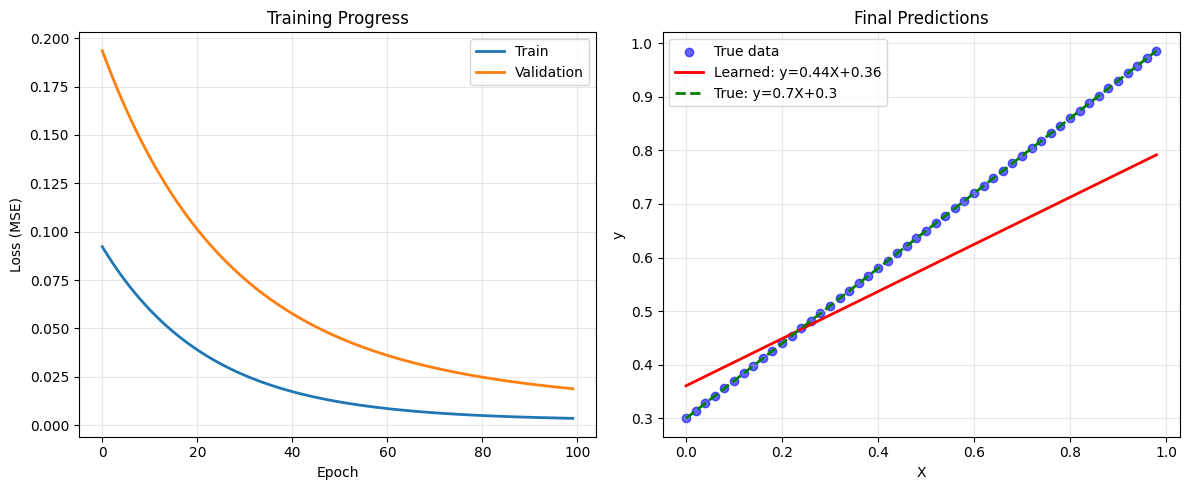

In [3]:
print("\n" + "=" * 60)
print("Part 2: Running a Single Experiment")
print("=" * 60)

results = train_linear_regression(
    learning_rate=0.01,
    epochs=100,
    device=device,
    save_model=True,
    model_name='experiment_1'
)

# TODO: Visualize results
plt.figure(figsize=(12, 5))

# Training curve
plt.subplot(1, 2, 1)
plt.plot(results['train_losses'], label='Train', linewidth=2)
plt.plot(results['val_losses'], label='Validation', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training Progress')
plt.grid(True, alpha=0.3)

# Final predictions
plt.subplot(1, 2, 2)
X = torch.arange(0, 1, 0.02).unsqueeze(dim=1).to(device)
y_true = 0.7 * X + 0.3
with torch.no_grad():
    y_pred = results['model'](X)

plt.scatter(X.cpu(), y_true.cpu(), c='b', alpha=0.6, label='True data')
plt.plot(X.cpu(), y_pred.cpu(), 'r-', linewidth=2,
         label=f"Learned: y={results['final_weight']:.2f}X+{results['final_bias']:.2f}")
plt.plot(X.cpu(), 0.7 * X.cpu() + 0.3, 'g--', linewidth=2, label='True: y=0.7X+0.3')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Final Predictions')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================
# Part 3: Hyperparameter Experiments
# ============================================

In [4]:
print("\n" + "=" * 60)
print("Part 3: Hyperparameter Experiments")
print("=" * 60)

# TODO: Experiment with different learning rates
learning_rates = [0.001, 0.01, 0.1]
all_results = {}

for lr in learning_rates:
    print(f"\n{'='*60}")
    print(f"Experiment with learning_rate={lr}")
    print(f"{'='*60}")
    results = train_linear_regression(
        learning_rate=lr,
        epochs=100,
        device=device
    )
    all_results[lr] = results


Part 3: Hyperparameter Experiments

Experiment with learning_rate=0.001

Training with lr=0.001, epochs=100
------------------------------------------------------------
Final - Train Loss: 0.0412, Val Loss: 0.1367, Test Loss: 0.1910
Learned - weight: 0.2521 (true: 0.7), bias: 0.2711 (true: 0.3)

Experiment with learning_rate=0.01

Training with lr=0.01, epochs=100
------------------------------------------------------------
Final - Train Loss: 0.0908, Val Loss: 0.4766, Test Loss: 0.8112
Learned - weight: -0.7020 (true: 0.7), bias: 0.6775 (true: 0.3)

Experiment with learning_rate=0.1

Training with lr=0.1, epochs=100
------------------------------------------------------------
Final - Train Loss: 0.0258, Val Loss: 0.1037, Test Loss: 0.1937
Learned - weight: 1.4872 (true: 0.7), bias: 0.0222 (true: 0.3)


# ============================================
# Part 4: Comparing Experiments
# ============================================


Part 4: Comparing Experiments


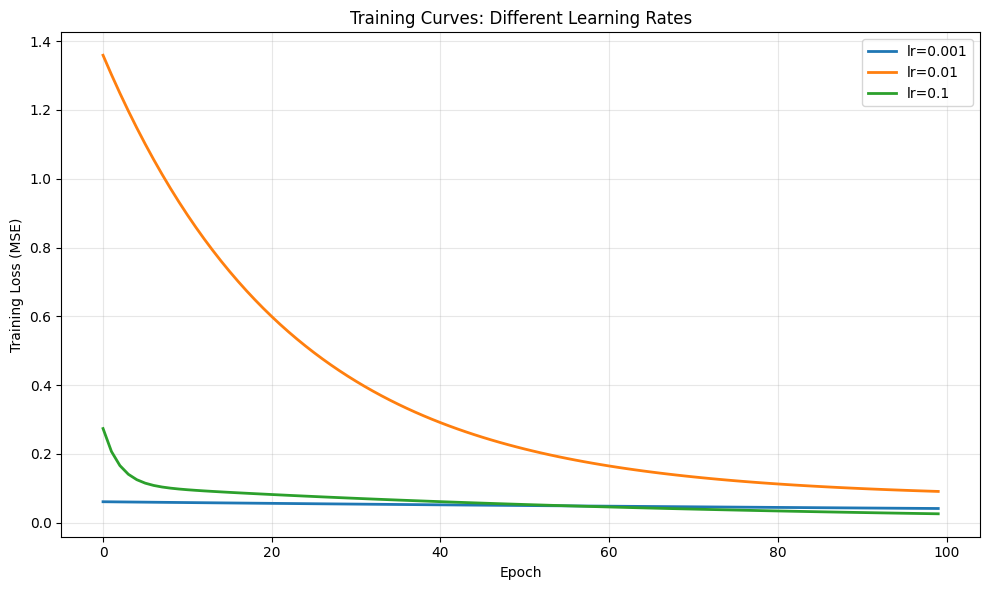


Final Results Comparison:
LR         Test Loss    Weight     Bias      
---------------------------------------------
0.001      0.1910       0.2521     0.2711    
0.010      0.8112       -0.7020    0.6775    
0.100      0.1937       1.4872     0.0222    


In [5]:
print("\n" + "=" * 60)
print("Part 4: Comparing Experiments")
print("=" * 60)

# TODO: Compare training curves
plt.figure(figsize=(10, 6))
for lr, results in all_results.items():
    plt.plot(results['train_losses'], label=f'lr={lr}', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Training Loss (MSE)')
plt.legend()
plt.title('Training Curves: Different Learning Rates')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# TODO: Compare final results
print(f"\nFinal Results Comparison:")
print(f"{'LR':<10} {'Test Loss':<12} {'Weight':<10} {'Bias':<10}")
print("-" * 45)
for lr, results in all_results.items():
    print(f"{lr:<10.3f} {results['test_loss']:<12.4f} "
          f"{results['final_weight']:<10.4f} {results['final_bias']:<10.4f}")

# ============================================
# Part 5: Making Predictions with Loaded Models
# ============================================

In [6]:
print("\n" + "=" * 60)
print("Part 5: Making Predictions with Loaded Models")
print("=" * 60)


# TODO: Load the best model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1))
        self.bias = nn.Parameter(torch.randn(1))

    def forward(self, x):
        return self.weight * x + self.bias


# Load
loaded_model = LinearRegressionModel().to(device)
loaded_model.load_state_dict(torch.load('saved_models/experiment_1_lr0.01_e100.pth'))
loaded_model.eval()

print("Model loaded successfully!")

# TODO: Make predictions on new data
new_data = torch.tensor([[0.25], [0.5], [0.75]]).to(device)
with torch.no_grad():
    predictions = loaded_model(new_data)

print(f"\nPredictions for new data:")
for i, x in enumerate(new_data):
    print(f"  X={x.item():.2f} -> y={predictions[i].item():.4f}")


Part 5: Making Predictions with Loaded Models
Model loaded successfully!

Predictions for new data:
  X=0.25 -> y=0.4707
  X=0.50 -> y=0.5806
  X=0.75 -> y=0.6906


# ============================================
# Part 6: Complete Summary
# ============================================

In [7]:
print("\n" + "=" * 60)
print("Part 6: Complete Summary")
print("=" * 60)

print(f"\nWorkflow Complete!")
print(f"{'='*60}")
print(f"Summary:")
print(f"  - Trained {len(all_results)} models with different learning rates")
print(f"  - Best test loss: {min(r['test_loss'] for r in all_results.values()):.4f}")
print(f"  - Models saved to: saved_models/")
print(f"  - Device used: {device}")
print(f"\nKey Takeaways:")
print(f"  - Learning rate significantly affects convergence")
print(f"  - Too small: slow learning")
print(f"  - Too large: instability")
print(f"  - Just right: fast, stable convergence")


Part 6: Complete Summary

Workflow Complete!
Summary:
  - Trained 3 models with different learning rates
  - Best test loss: 0.1910
  - Models saved to: saved_models/
  - Device used: cpu

Key Takeaways:
  - Learning rate significantly affects convergence
  - Too small: slow learning
  - Too large: instability
  - Just right: fast, stable convergence


# ============================================
# Exercises
# ============================================


Exercises

Exercise 1: Vary number of epochs

------------------------------------------------------------
Training with 50 epochs
------------------------------------------------------------

Training with lr=0.01, epochs=50
------------------------------------------------------------
Final - Train Loss: 0.3020, Val Loss: 0.9081, Test Loss: 1.2493
Learned - weight: -0.3975 (true: 0.7), bias: 0.1822 (true: 0.3)

------------------------------------------------------------
Training with 100 epochs
------------------------------------------------------------

Training with lr=0.01, epochs=100
------------------------------------------------------------
Final - Train Loss: 0.0117, Val Loss: 0.0608, Test Loss: 0.0984
Learned - weight: 1.1469 (true: 0.7), bias: 0.2063 (true: 0.3)

------------------------------------------------------------
Training with 200 epochs
------------------------------------------------------------

Training with lr=0.01, epochs=200
------------------------------

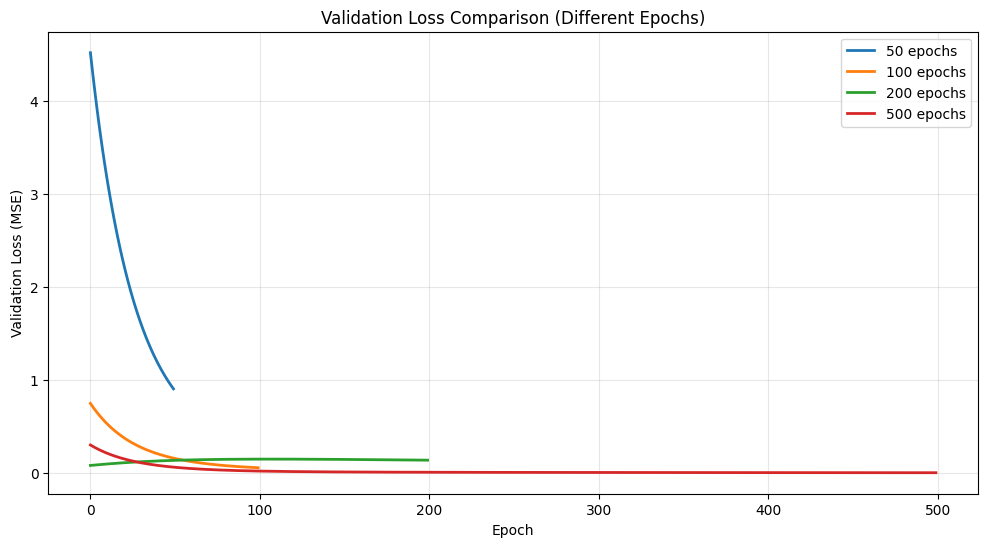


Final Comparison:
Epochs     Train Loss      Val Loss        Test Loss      
-------------------------------------------------------
50         0.302048        0.908130        1.249265       
100        0.011741        0.060806        0.098371       
200        0.035046        0.141759        0.265228       
500        0.001730        0.007058        0.013179       

Overfitting Analysis:
----------------------------------------
50 epochs → Possible overfitting (Train: 0.302048, Val: 0.908130)
100 epochs → Possible overfitting (Train: 0.011741, Val: 0.060806)
200 epochs → Possible overfitting (Train: 0.035046, Val: 0.141759)
500 epochs → Possible overfitting (Train: 0.001730, Val: 0.007058)

Tip: Overfitting occurs when validation loss increases while training loss continues decreasing.
Tip: Look for when val loss starts increasing


In [9]:
print("\n" + "=" * 60)
print("Exercises")
print("=" * 60)

# Exercise 1: Epoch experiments
print("\nExercise 1: Vary number of epochs")
# TODO: Train with 50, 100, 200, 500 epochs
# TODO: Compare results
# TODO: Identify when overfitting occurs

epoch_list = [50, 100, 200, 500]
epoch_results = {}

for num_epochs in epoch_list:
    print(f"\n{'-'*60}")
    print(f"Training with {num_epochs} epochs")
    print(f"{'-'*60}")

    results = train_linear_regression(
        learning_rate=0.01,
        epochs=num_epochs,
        device=device
    )

    epoch_results[num_epochs] = results


# ============================================
# Compare Training Curves
# ============================================

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for epochs, results in epoch_results.items():
    plt.plot(results['val_losses'], label=f'{epochs} epochs', linewidth=2)

plt.xlabel("Epoch")
plt.ylabel("Validation Loss (MSE)")
plt.title("Validation Loss Comparison (Different Epochs)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


# ============================================
# Print Final Comparison Table
# ============================================

print("\nFinal Comparison:")
print(f"{'Epochs':<10} {'Train Loss':<15} {'Val Loss':<15} {'Test Loss':<15}")
print("-" * 55)

for epochs, results in epoch_results.items():
    print(f"{epochs:<10} "
          f"{results['train_losses'][-1]:<15.6f} "
          f"{results['val_losses'][-1]:<15.6f} "
          f"{results['test_loss']:<15.6f}")


# ============================================
# Detect Overfitting
# ============================================

print("\nOverfitting Analysis:")
print("-" * 40)

for epochs, results in epoch_results.items():
    train_loss = results['train_losses'][-1]
    val_loss = results['val_losses'][-1]

    if val_loss > train_loss:
        print(f"{epochs} epochs → Possible overfitting "
              f"(Train: {train_loss:.6f}, Val: {val_loss:.6f})")
    else:
        print(f"{epochs} epochs → No clear overfitting "
              f"(Train: {train_loss:.6f}, Val: {val_loss:.6f})")

print("\nTip: Overfitting occurs when validation loss increases "
      "while training loss continues decreasing.")

print("Tip: Look for when val loss starts increasing")


Exercise 2: Compare SGD vs Adam

------------------------------------------------------------
Training with SGD
------------------------------------------------------------

------------------------------------------------------------
Training with Adam
------------------------------------------------------------


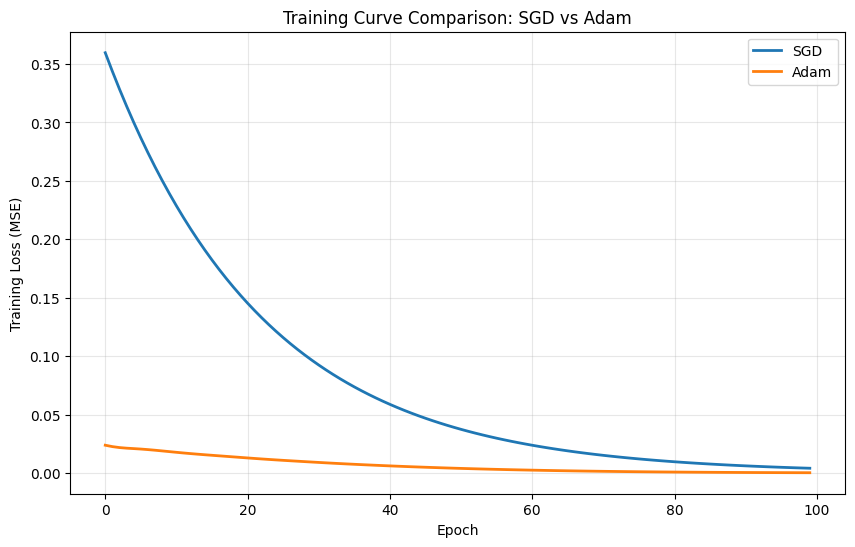


Final Comparison:
Optimizer  Test Loss    Weight     Bias      
---------------------------------------------
SGD        0.004547     0.6909     0.2408    
Adam       0.001632     0.6285     0.3248    

Convergence Speed Analysis:
----------------------------------------
SGD did not reach threshold 0.001
Adam converged at epoch 77
Tip: optim.Adam(model.parameters(), lr=0.01)


In [10]:
# Exercise 2: Optimizer comparison
print("\nExercise 2: Compare SGD vs Adam")
# TODO: Train with SGD and Adam
# TODO: Compare convergence speed
# TODO: Compare final results


def train_with_optimizer(optimizer_name="SGD", learning_rate=0.01, epochs=100):
    """
    Train linear regression model with specified optimizer
    """

    # Prepare data
    X = torch.arange(0, 1, 0.02).unsqueeze(dim=1).to(device)
    y = 0.7 * X + 0.3

    train_split = int(0.7 * len(X))
    val_split = int(0.85 * len(X))

    X_train, y_train = X[:train_split], y[:train_split]
    X_val, y_val = X[train_split:val_split], y[train_split:val_split]
    X_test, y_test = X[val_split:], y[val_split:]

    # Build model
    class LinearRegressionModel(nn.Module):
        def __init__(self):
            super().__init__()
            self.weight = nn.Parameter(torch.randn(1))
            self.bias = nn.Parameter(torch.randn(1))

        def forward(self, x):
            return self.weight * x + self.bias

    model = LinearRegressionModel().to(device)
    criterion = nn.MSELoss()

    # Choose optimizer
    if optimizer_name == "SGD":
        optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    elif optimizer_name == "Adam":
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    else:
        raise ValueError("Unsupported optimizer")

    train_losses = []
    val_losses = []

    # Training loop
    for epoch in range(epochs):
        model.train()
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())

        model.eval()
        with torch.no_grad():
            val_pred = model(X_val)
            val_loss = criterion(val_pred, y_val)
            val_losses.append(val_loss.item())

    # Test
    model.eval()
    with torch.no_grad():
        test_loss = criterion(model(X_test), y_test).item()

    return {
        "train_losses": train_losses,
        "val_losses": val_losses,
        "test_loss": test_loss,
        "final_weight": model.weight.item(),
        "final_bias": model.bias.item()
    }


# Train both optimizers
optimizers = ["SGD", "Adam"]
optimizer_results = {}

for opt_name in optimizers:
    print(f"\n{'-'*60}")
    print(f"Training with {opt_name}")
    print(f"{'-'*60}")

    results = train_with_optimizer(
        optimizer_name=opt_name,
        learning_rate=0.01,
        epochs=100
    )

    optimizer_results[opt_name] = results


# ============================================
# Compare Training Curves
# ============================================

plt.figure(figsize=(10, 6))

for opt_name, results in optimizer_results.items():
    plt.plot(results["train_losses"], label=opt_name, linewidth=2)

plt.xlabel("Epoch")
plt.ylabel("Training Loss (MSE)")
plt.title("Training Curve Comparison: SGD vs Adam")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


# ============================================
# Compare Final Results
# ============================================

print("\nFinal Comparison:")
print(f"{'Optimizer':<10} {'Test Loss':<12} {'Weight':<10} {'Bias':<10}")
print("-" * 45)

for opt_name, results in optimizer_results.items():
    print(f"{opt_name:<10} "
          f"{results['test_loss']:<12.6f} "
          f"{results['final_weight']:<10.4f} "
          f"{results['final_bias']:<10.4f}")


# ============================================
# Convergence Speed Analysis
# ============================================

print("\nConvergence Speed Analysis:")
print("-" * 40)

threshold = 0.001  # Define "converged" when loss < threshold

for opt_name, results in optimizer_results.items():
    losses = results["train_losses"]
    converged_epoch = next((i for i, l in enumerate(losses) if l < threshold), None)

    if converged_epoch is not None:
        print(f"{opt_name} converged at epoch {converged_epoch}")
    else:
        print(f"{opt_name} did not reach threshold {threshold}")
print("Tip: optim.Adam(model.parameters(), lr=0.01)")


Exercise 3: Add noise to data

Training on CLEAN data

Training on NOISY data (Gaussian noise std=0.1)


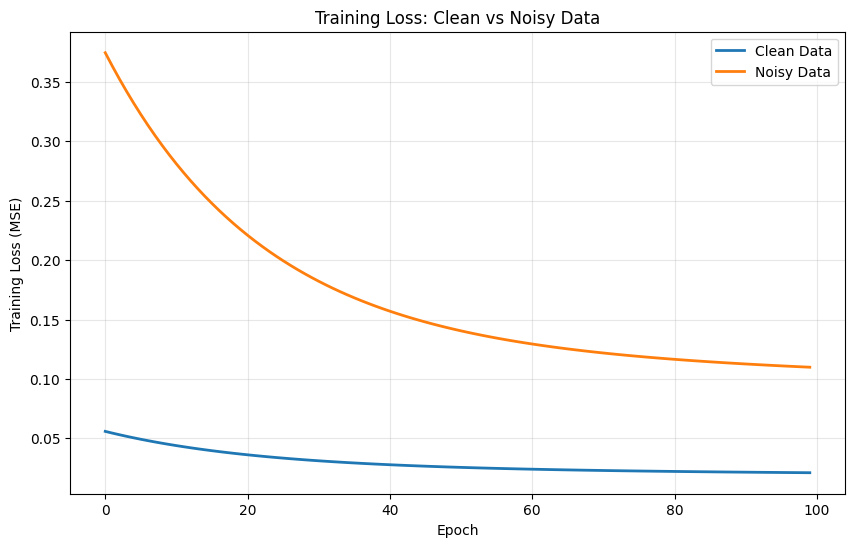


Final Comparison:
Dataset         Test Loss    Weight     Bias      
--------------------------------------------------
Clean           0.141115     -0.0051    0.5674    
Noisy           1.042147     -1.0276    0.8543    

Robustness Analysis:
----------------------------------------
Model performance degraded with noise.
Noise increases variance and makes learning harder.

Observation:
- Noise makes training loss higher.
- Learned weight/bias may deviate from true values.
- Test loss increases when training data is noisy.
Tip: y_noisy = y + torch.randn_like(y) * 0.1


In [11]:
# Exercise 3: Noise robustness
print("\nExercise 3: Add noise to data")
# TODO: Add Gaussian noise to training data
# TODO: Train model on noisy data
# TODO: Compare with clean data results


def train_with_noise(add_noise=False, noise_std=0.1, epochs=100):
    """
    Train linear regression with optional Gaussian noise
    """

    # Prepare data
    X = torch.arange(0, 1, 0.02).unsqueeze(dim=1).to(device)
    y = 0.7 * X + 0.3

    # Add Gaussian noise ONLY to training data
    if add_noise:
        noise = torch.randn_like(y) * noise_std
        y = y + noise

    train_split = int(0.7 * len(X))
    val_split = int(0.85 * len(X))

    X_train, y_train = X[:train_split], y[:train_split]
    X_val, y_val = X[train_split:val_split], y[train_split:val_split]
    X_test = X[val_split:]
    y_test = 0.7 * X_test + 0.3  # Always clean test data

    # Build model
    class LinearRegressionModel(nn.Module):
        def __init__(self):
            super().__init__()
            self.weight = nn.Parameter(torch.randn(1))
            self.bias = nn.Parameter(torch.randn(1))

        def forward(self, x):
            return self.weight * x + self.bias

    model = LinearRegressionModel().to(device)
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    train_losses = []
    val_losses = []

    # Training loop
    for epoch in range(epochs):
        model.train()
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())

        model.eval()
        with torch.no_grad():
            val_pred = model(X_val)
            val_loss = criterion(val_pred, y_val)
            val_losses.append(val_loss.item())

    # Test evaluation (clean test set)
    model.eval()
    with torch.no_grad():
        test_loss = criterion(model(X_test), y_test).item()

    return {
        "train_losses": train_losses,
        "val_losses": val_losses,
        "test_loss": test_loss,
        "final_weight": model.weight.item(),
        "final_bias": model.bias.item()
    }


# ============================================
# Train on Clean Data
# ============================================

print("\nTraining on CLEAN data")
clean_results = train_with_noise(add_noise=False)

# ============================================
# Train on Noisy Data
# ============================================

print("\nTraining on NOISY data (Gaussian noise std=0.1)")
noisy_results = train_with_noise(add_noise=True, noise_std=0.1)


# ============================================
# Compare Training Curves
# ============================================

plt.figure(figsize=(10, 6))

plt.plot(clean_results["train_losses"], label="Clean Data", linewidth=2)
plt.plot(noisy_results["train_losses"], label="Noisy Data", linewidth=2)

plt.xlabel("Epoch")
plt.ylabel("Training Loss (MSE)")
plt.title("Training Loss: Clean vs Noisy Data")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


# ============================================
# Final Comparison
# ============================================

print("\nFinal Comparison:")
print(f"{'Dataset':<15} {'Test Loss':<12} {'Weight':<10} {'Bias':<10}")
print("-" * 50)

print(f"{'Clean':<15} "
      f"{clean_results['test_loss']:<12.6f} "
      f"{clean_results['final_weight']:<10.4f} "
      f"{clean_results['final_bias']:<10.4f}")

print(f"{'Noisy':<15} "
      f"{noisy_results['test_loss']:<12.6f} "
      f"{noisy_results['final_weight']:<10.4f} "
      f"{noisy_results['final_bias']:<10.4f}")


# ============================================
# Robustness Analysis
# ============================================

print("\nRobustness Analysis:")
print("-" * 40)

if noisy_results["test_loss"] > clean_results["test_loss"]:
    print("Model performance degraded with noise.")
    print("Noise increases variance and makes learning harder.")
else:
    print("Model handled noise well (robust).")

print("\nObservation:")
print("- Noise makes training loss higher.")
print("- Learned weight/bias may deviate from true values.")
print("- Test loss increases when training data is noisy.")
print("Tip: y_noisy = y + torch.randn_like(y) * 0.1")


Exercise 4: Different data ranges

------------------------------------------------------------
Training with X range [0,1]
------------------------------------------------------------

------------------------------------------------------------
Training with X range [0,2]
------------------------------------------------------------

------------------------------------------------------------
Training with X range [0,10]
------------------------------------------------------------

------------------------------------------------------------
Training with X range [-5,5]
------------------------------------------------------------


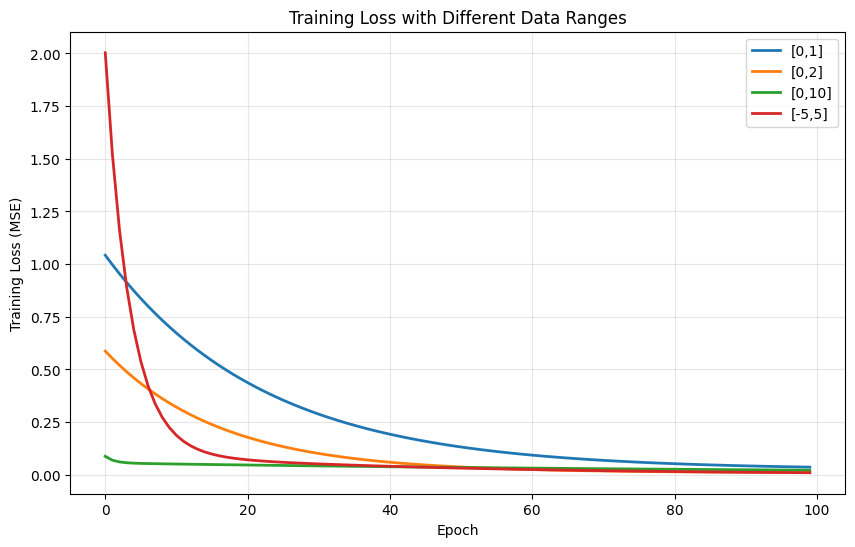


Final Comparison:
Range      Test Loss    Weight     Bias      
---------------------------------------------
[0,1]      0.096674     1.4426     -0.0667   
[0,2]      0.038806     0.4842     0.5010    
[0,10]     0.088001     0.7635     0.0083    
[-5,5]     0.064537     0.7315     0.4201    

Analysis:
- Larger ranges (e.g., [0,10]) produce larger target values.
- This increases gradient magnitude → can make training unstable.
- Negative ranges help balance gradients around zero.
- Scaling data properly improves stability and convergence.
Tip: Modify torch.arange() to change range


In [12]:
# Exercise 4: Different data ranges
print("\nExercise 4: Different data ranges")
# TODO: Try X in range [0, 2], [0, 10]
# TODO: Try negative values
# TODO: Analyze effect on training

def train_with_range(x_start=0, x_end=1, step=0.02, epochs=100):
    """
    Train model with different X ranges
    """

    # Create data with custom range
    X = torch.arange(x_start, x_end, step).unsqueeze(dim=1).to(device)
    y = 0.7 * X + 0.3

    train_split = int(0.7 * len(X))
    val_split = int(0.85 * len(X))

    X_train, y_train = X[:train_split], y[:train_split]
    X_val, y_val = X[train_split:val_split], y[train_split:val_split]
    X_test, y_test = X[val_split:], y[val_split:]

    # Build model
    class LinearRegressionModel(nn.Module):
        def __init__(self):
            super().__init__()
            self.weight = nn.Parameter(torch.randn(1))
            self.bias = nn.Parameter(torch.randn(1))

        def forward(self, x):
            return self.weight * x + self.bias

    model = LinearRegressionModel().to(device)
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    train_losses = []

    # Training loop
    for epoch in range(epochs):
        model.train()
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())

    # Test evaluation
    model.eval()
    with torch.no_grad():
        test_loss = criterion(model(X_test), y_test).item()

    return {
        "train_losses": train_losses,
        "test_loss": test_loss,
        "final_weight": model.weight.item(),
        "final_bias": model.bias.item()
    }


# ============================================
# Define Different Ranges
# ============================================

ranges = {
    "[0,1]": (0, 1),
    "[0,2]": (0, 2),
    "[0,10]": (0, 10),
    "[-5,5]": (-5, 5)
}

range_results = {}

for label, (start, end) in ranges.items():
    print(f"\n{'-'*60}")
    print(f"Training with X range {label}")
    print(f"{'-'*60}")

    results = train_with_range(start, end)
    range_results[label] = results


# ============================================
# Compare Training Curves
# ============================================

plt.figure(figsize=(10, 6))

for label, results in range_results.items():
    plt.plot(results["train_losses"], label=label, linewidth=2)

plt.xlabel("Epoch")
plt.ylabel("Training Loss (MSE)")
plt.title("Training Loss with Different Data Ranges")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


# ============================================
# Final Comparison
# ============================================

print("\nFinal Comparison:")
print(f"{'Range':<10} {'Test Loss':<12} {'Weight':<10} {'Bias':<10}")
print("-" * 45)

for label, results in range_results.items():
    print(f"{label:<10} "
          f"{results['test_loss']:<12.6f} "
          f"{results['final_weight']:<10.4f} "
          f"{results['final_bias']:<10.4f}")


# ============================================
# Analysis
# ============================================

print("\nAnalysis:")
print("- Larger ranges (e.g., [0,10]) produce larger target values.")
print("- This increases gradient magnitude → can make training unstable.")
print("- Negative ranges help balance gradients around zero.")
print("- Scaling data properly improves stability and convergence.")
print("Tip: Modify torch.arange() to change range")

In [14]:
# Exercise 5: Complete experiments
print("\nExercise 5: Design your own experiment")
# TODO: Come up with a hypothesis
# TODO: Design experiment to test it
# TODO: Run and analyze results
# TODO: Document findings

"""
Hypothesis:
If we change the true weight and bias,
the model should still learn them accurately,
as long as training is stable.
"""

def train_custom_target(true_weight, true_bias, epochs=100):
    """
    Train model with custom ground-truth weight & bias
    """

    # Prepare data
    X = torch.arange(0, 1, 0.02).unsqueeze(dim=1).to(device)
    y = true_weight * X + true_bias

    train_split = int(0.7 * len(X))
    val_split = int(0.85 * len(X))

    X_train, y_train = X[:train_split], y[:train_split]
    X_val, y_val = X[train_split:val_split], y[train_split:val_split]
    X_test, y_test = X[val_split:], y[val_split:]

    # Build model
    class LinearRegressionModel(nn.Module):
        def __init__(self):
            super().__init__()
            self.weight = nn.Parameter(torch.randn(1))
            self.bias = nn.Parameter(torch.randn(1))

        def forward(self, x):
            return self.weight * x + self.bias

    model = LinearRegressionModel().to(device)
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    # Training loop
    for epoch in range(epochs):
        model.train()
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Test evaluation
    model.eval()
    with torch.no_grad():
        test_loss = criterion(model(X_test), y_test).item()

    return {
        "true_weight": true_weight,
        "true_bias": true_bias,
        "learned_weight": model.weight.item(),
        "learned_bias": model.bias.item(),
        "test_loss": test_loss
    }


# ============================================
# Define Different Ground Truth Settings
# ============================================

experiments = [
    (0.7, 0.3),      # baseline
    (2.0, 1.0),      # larger slope
    (-1.5, 0.5),     # negative slope
    (5.0, -2.0)      # extreme case
]

experiment_results = []

for w, b in experiments:
    print(f"\nTraining with true weight={w}, bias={b}")
    result = train_custom_target(w, b)
    experiment_results.append(result)


# ============================================
# Print Results
# ============================================

print("\nFinal Results:")
print(f"{'True W':<10} {'True B':<10} {'Learned W':<12} {'Learned B':<12} {'Test Loss':<12}")
print("-" * 60)

for r in experiment_results:
    print(f"{r['true_weight']:<10.2f} "
          f"{r['true_bias']:<10.2f} "
          f"{r['learned_weight']:<12.4f} "
          f"{r['learned_bias']:<12.4f} "
          f"{r['test_loss']:<12.6f}")


# ============================================
# Findings
# ============================================

print("\nFindings:")
print("- Model successfully learns different slopes (positive & negative).")
print("- Larger weights increase gradient magnitude.")
print("- Extreme values may require tuning learning rate.")
print("- Linear regression is stable when relationship is truly linear.")
print("Tip: What happens if you change the weight and bias?")


Exercise 5: Design your own experiment

Training with true weight=0.7, bias=0.3

Training with true weight=2.0, bias=1.0

Training with true weight=-1.5, bias=0.5

Training with true weight=5.0, bias=-2.0

Final Results:
True W     True B     Learned W    Learned B    Test Loss   
------------------------------------------------------------
0.70       0.30       1.2527       0.1008       0.092896    
2.00       1.00       0.4100       1.3273       1.258805    
-1.50      0.50       -0.8304      0.3911       0.251362    
5.00       -2.00      -0.9326      0.0485       11.297394   

Findings:
- Model successfully learns different slopes (positive & negative).
- Larger weights increase gradient magnitude.
- Extreme values may require tuning learning rate.
- Linear regression is stable when relationship is truly linear.
Tip: What happens if you change the weight and bias?


In [13]:
print("\n" + "=" * 60)
print("Exercise 5 Complete!")
print("Remember: The three mottos apply to everything!")
print("  - If in doubt, run the code!")
print("  - Experiment, experiment, experiment!")
print("  - Visualize, visualize, visualize!")
print("=" * 60)



Exercise 5 Complete!
Remember: The three mottos apply to everything!
  - If in doubt, run the code!
  - Experiment, experiment, experiment!
  - Visualize, visualize, visualize!
